#### You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer) 

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other 
variables. 

Below are the steps you can follow.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and its applications to real-world healthcare problems. Good luck!

In [102]:
#Install Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###  Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [12]:
#Import dataset

df=pd.read_csv("Assignment_5Apr_DecisionTree2/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#Descriptive statistics

df.info()
df.describe()

#Insight: Many features have minimum value as zero which needs imputation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


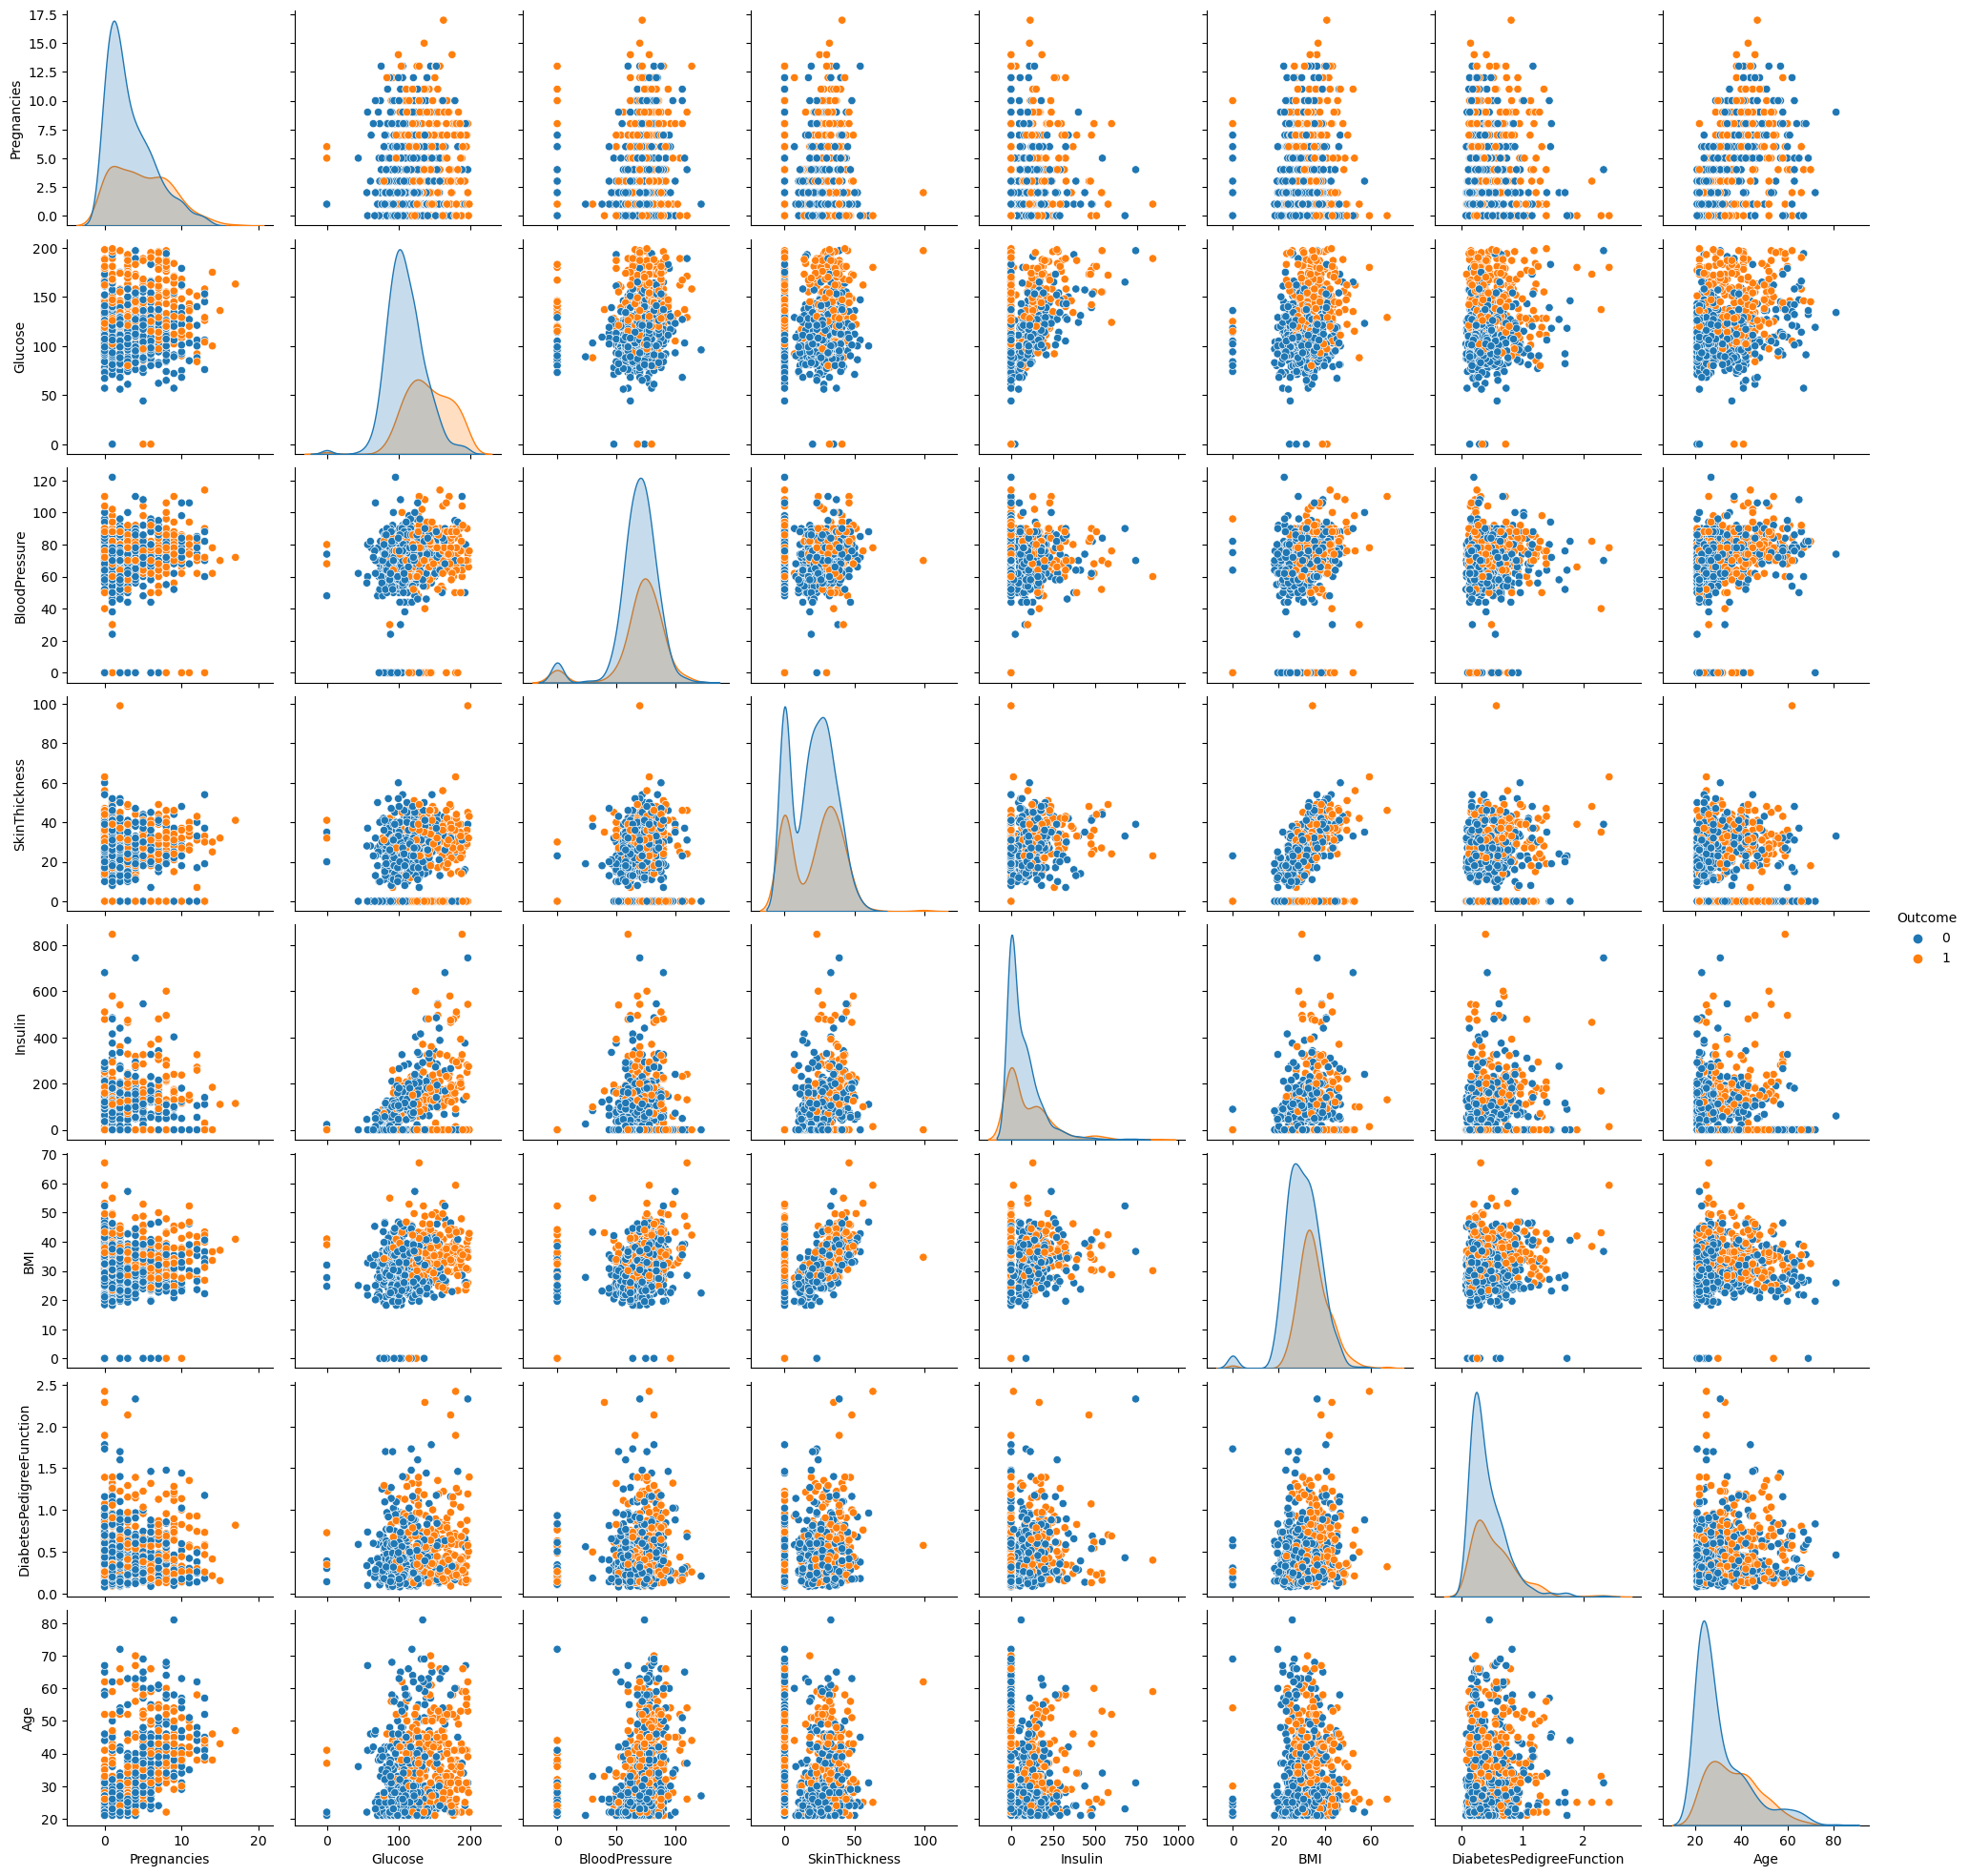

In [21]:
sns.pairplot(data=df,hue="Outcome")

#Insight: Features like Skinthickness, Insulin, DiabetesPedigreeFunction, Age are Left skewed

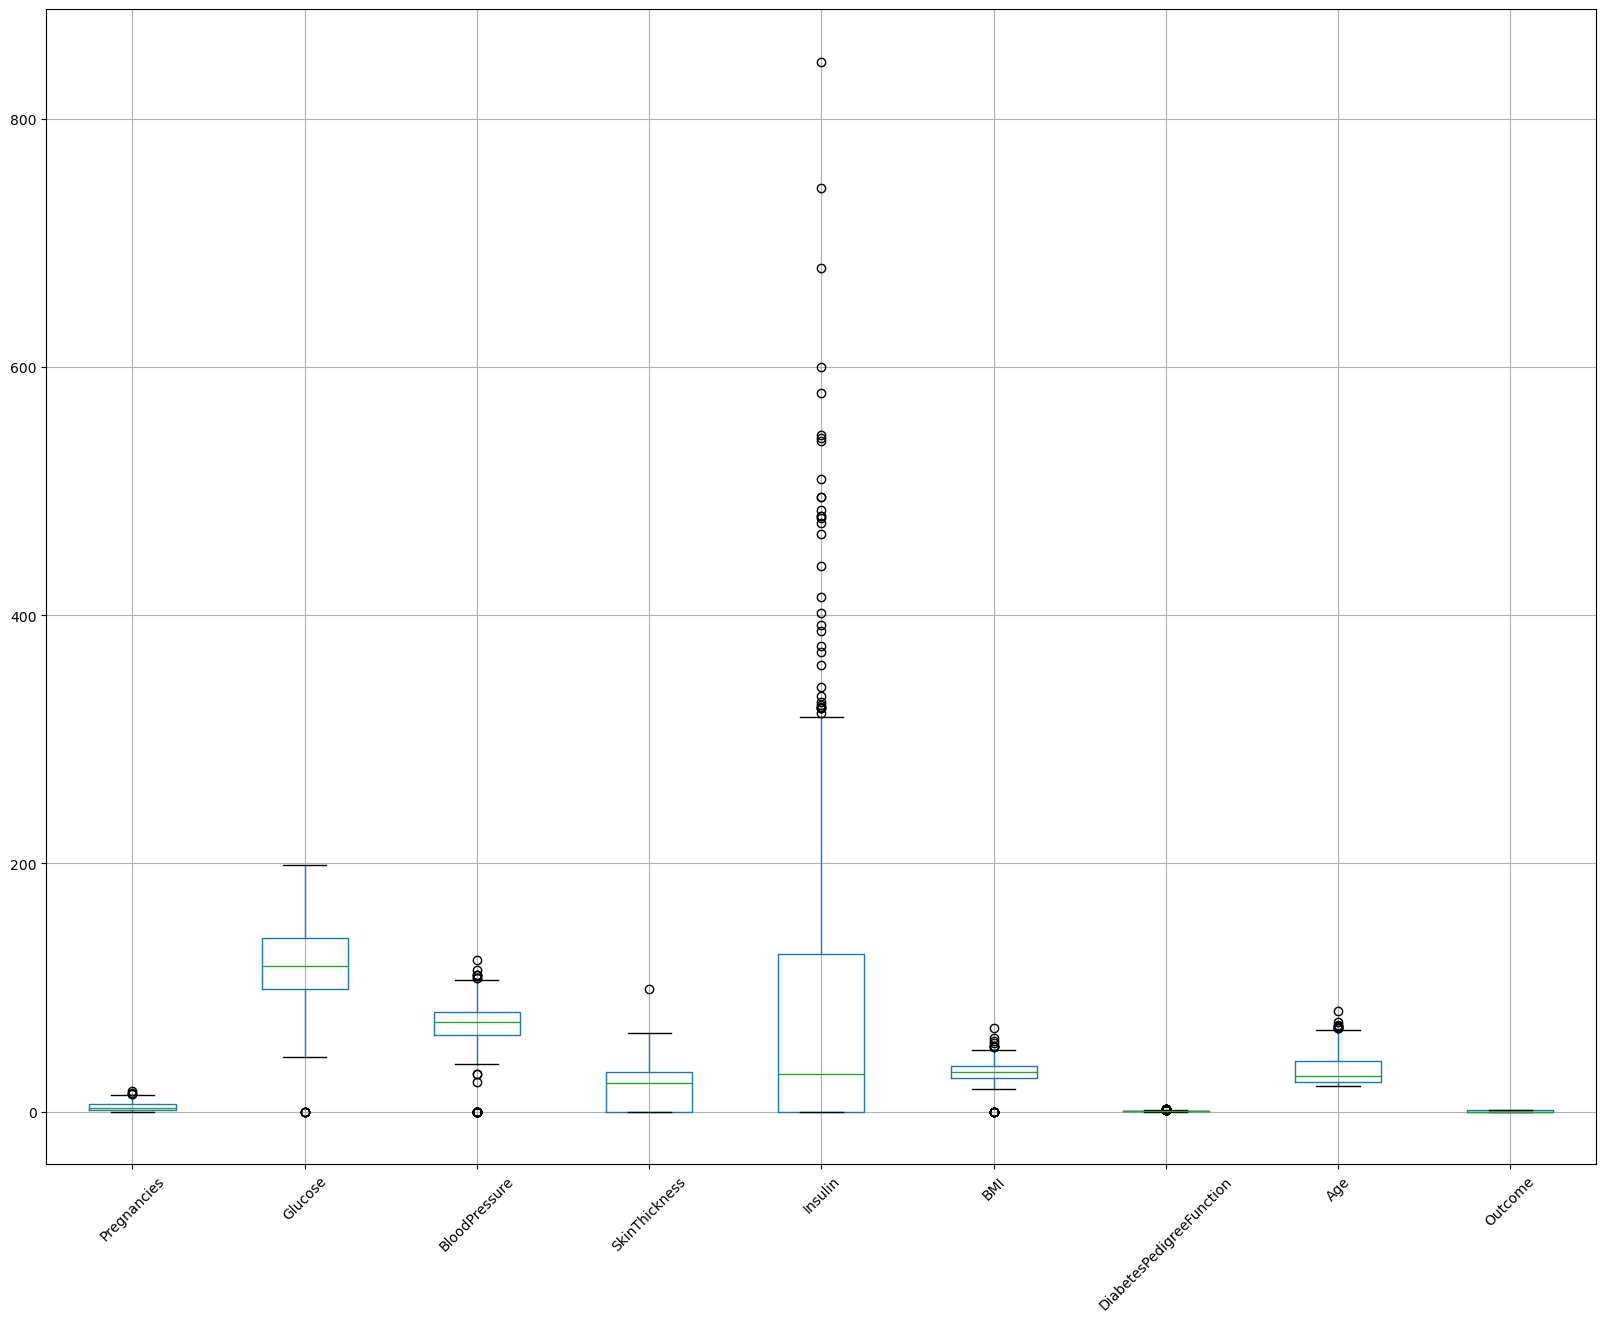

In [19]:
plt.figure(figsize=(20,15))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

#Insight: Insulin feature has many outliers, data standardisation is required here

###  Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [27]:
# Look for null values
df.isnull().sum()

#Insight: No null values; No categorical variables to transform
#Insight: Insulin has many outliers so removing them is not a good option. Instead, we will standardize all the variables

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
#Some columns have minimum value of zero, it is not possible. replace them with mean values.
# Columns are Glucose; Insulin; skin thickness; BMI; Blood Pressure

zero_val_cols=["Pregnancies","Glucose","Insulin", "SkinThickness", "BloodPressure", "BMI"]
for i in zero_val_cols:
    df[i]=df[i].replace(0,df[i].mean())
    
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###  Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [37]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Sepearte dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train.shape, X_test.shape

((576, 8), (192, 8))

###  Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [90]:
# Define the decision tree model
classifier = DecisionTreeClassifier(random_state=15)

#Scaling the data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=scaler.fit_transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

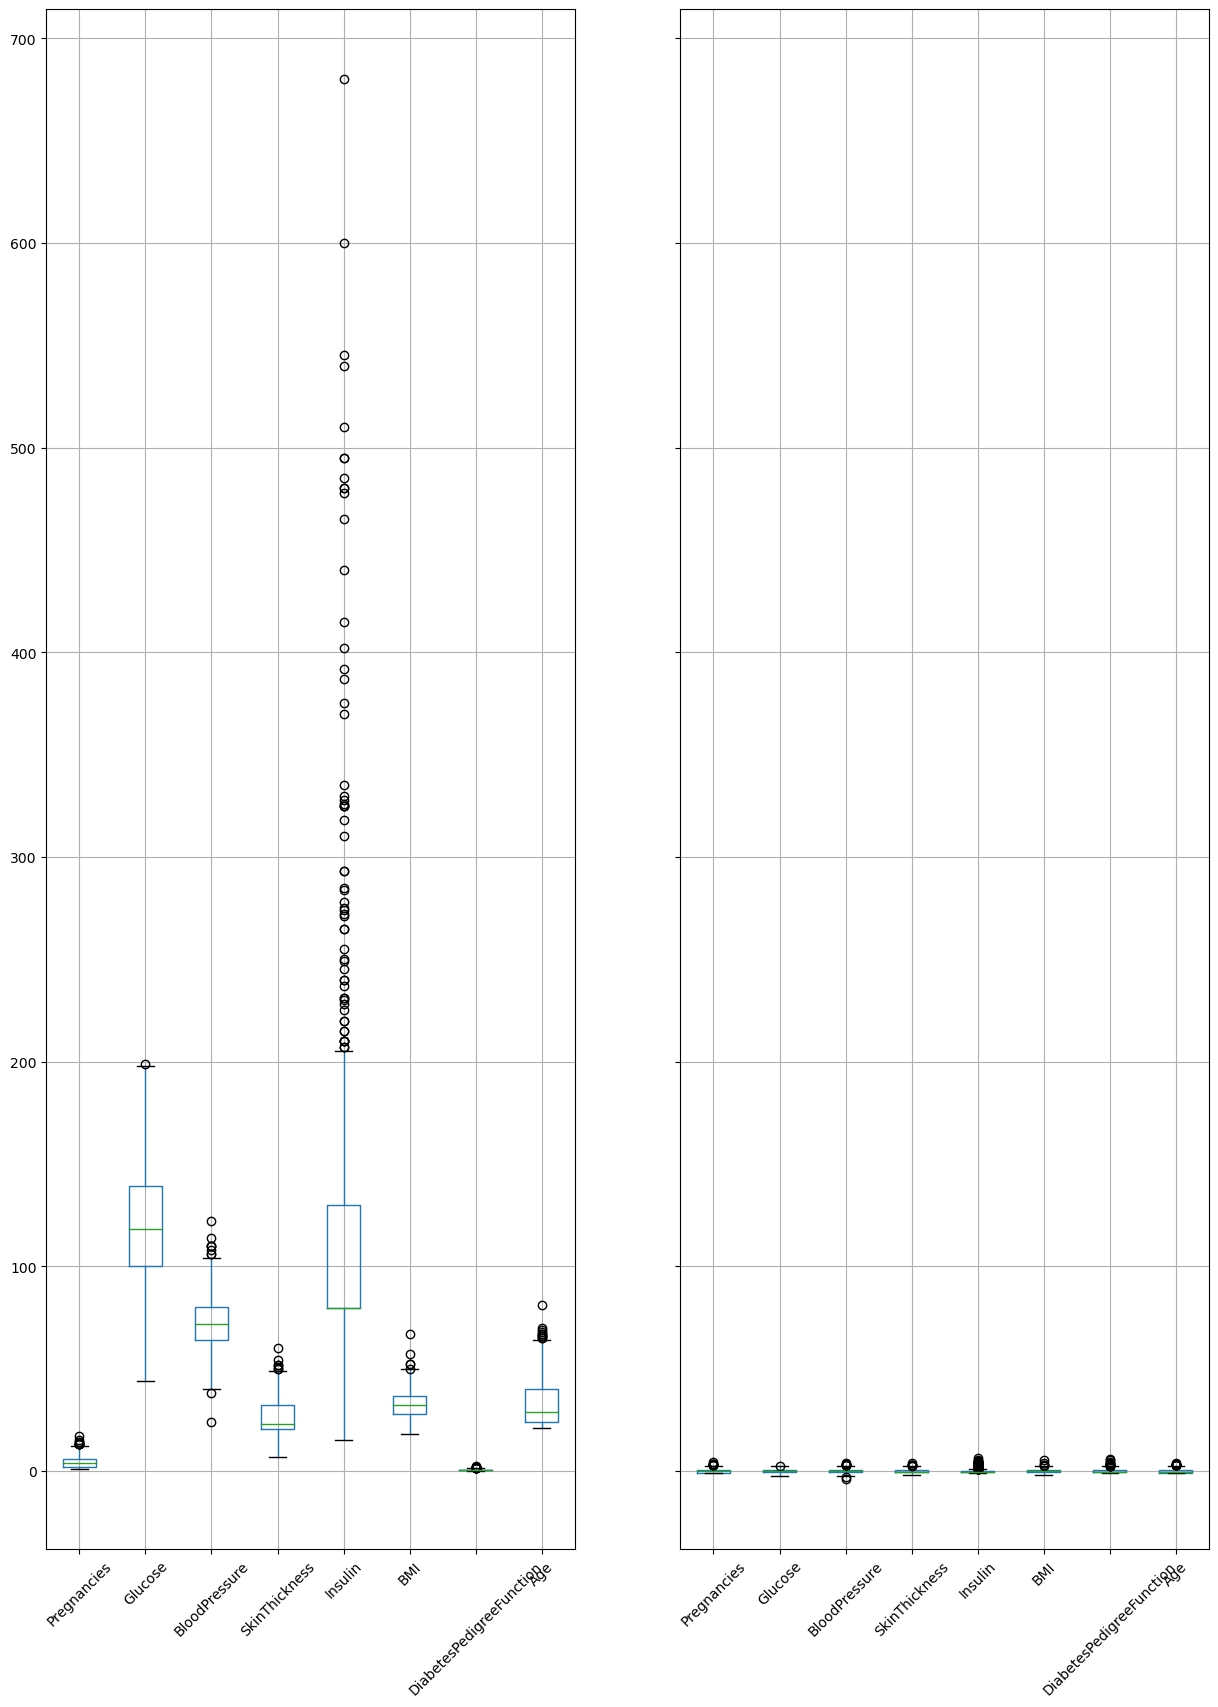

In [84]:
#Visualise before and after scaling
#plt.figure(figsize=(50,15))
plt.subplots(nrows=1, ncols=2, sharey=True, squeeze=True, figsize=(15,20))
plt.subplot(1,2,1)
X_train.boxplot(figsize=(15,20))
plt.xticks(rotation=45)
plt.subplot(1,2,2)
X_train_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=45)
plt.show()


In [91]:
# Define the hyperparameters to optimize
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    "splitter":["best","random"]
}

# Perform grid search cross-validation to find the best hyperparameters
clf = GridSearchCV(estimator=classifier, param_grid=hyperparameters, cv=10, scoring="accuracy")

In [92]:
#Train the model
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [93]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

###  Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [96]:
#Prediction on test dataset
y_pred=clf.predict(X_test_scaled)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [99]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[107,  22],
       [ 27,  36]], dtype=int64)

In [115]:
#Classification Report
print("Accuracy is: ",accuracy_score(y_test, y_pred),"\n")
print(classification_report(y_test, y_pred))

Accuracy is:  0.7447916666666666 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       129
           1       0.62      0.57      0.60        63

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.74      0.74      0.74       192



<module 'matplotlib.pyplot' from 'C:\\Users\\y0vwts9\\AppData\\Local\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

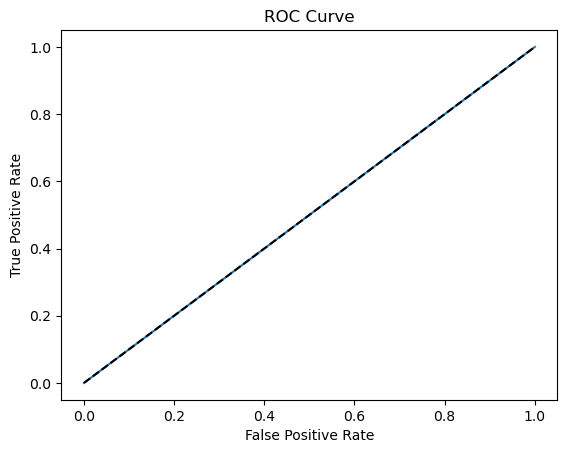

In [132]:
# Calculate probabilities and ROC curve
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt

#Insight: This ROC curve has an AUC of 0.5, meaning it ranks a random positive example higher than a random negative example 50% of the time. As such, the corresponding classification model is basically worthless, as its predictive ability is no better than random guessing.

###  Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [153]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.137578,1.409472,0.798025,1.833793,-0.588696,0.061910,-0.404861,1.441354
1,0.857637,-0.654834,0.138581,1.502866,-0.157462,0.716593,-0.830408,1.010831
2,-0.139971,0.011071,-0.356002,-0.644137,-0.443444,0.389252,-0.240233,-0.366841
3,0.192565,-0.455062,-0.026280,1.833793,-0.497910,0.552923,-0.647143,-0.022423
4,1.855245,-0.688129,0.303442,2.385338,0.693657,0.076790,-0.932912,2.560713


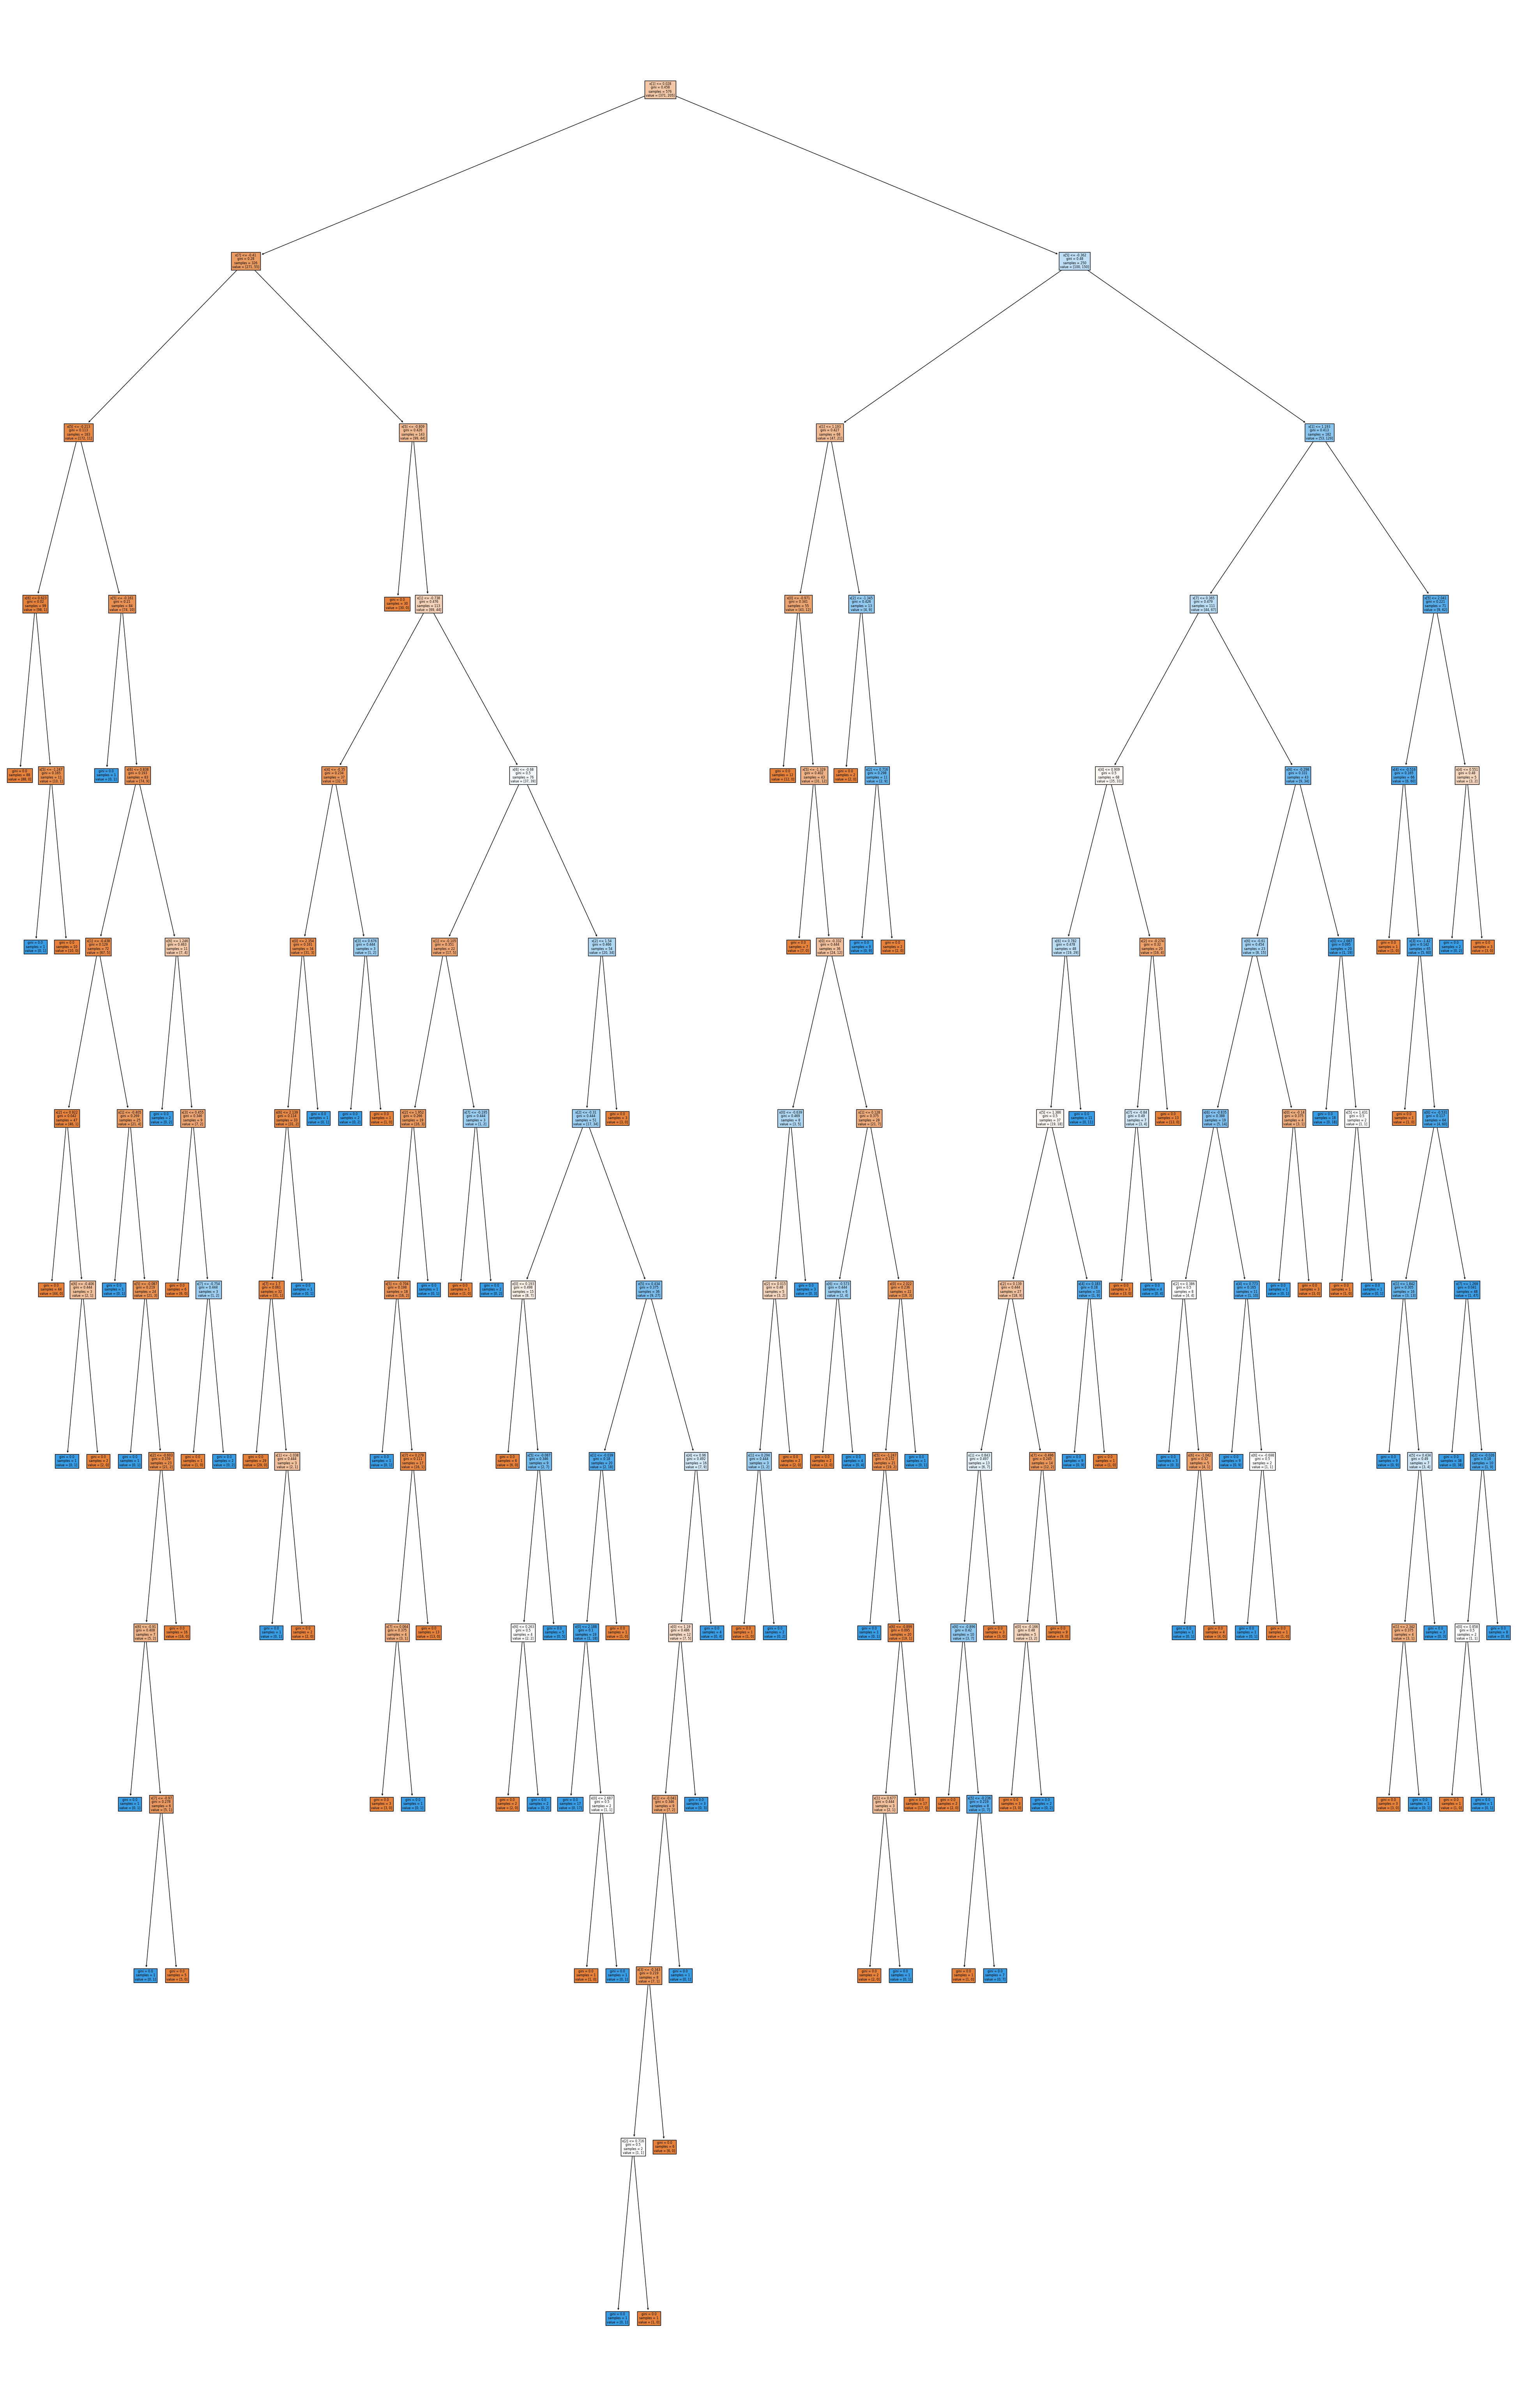

In [152]:
classifier.fit(X_train_scaled,y_train)

#Visualize decision tree
from sklearn import tree
plt.figure(figsize=(50,80))
tree.plot_tree(classifier,filled=True)
plt.show()

#Insight: Based on decision tree visualisation, we can infer that the features like Glucose, Age, BMI contributes majorly to predict whether a person have diabetes or not.

###  Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [176]:
# Load the new dataset and preprocess it
new_df=pd.read_csv("Assignment_5Apr_DecisionTree2/diabetes_new.csv")

#Split Dependent & Independent features
X_new=new_df.iloc[:,:-1]
y_new=new_df.iloc[:,-1]

#Scaling the data
scaler=StandardScaler()
X_new_scaled=scaler.fit_transform(X_new)
y_new_pred=clf.predict(X_new_scaled)


#Confusion Matrix
print(confusion_matrix(y_new, y_new_pred))

#Classification Report
print("Accuracy is: ",accuracy_score(y_new, y_new_pred),"\n")
print(classification_report(y_new, y_new_pred))

#Insight: Accuracy with new predicted data is around 80% and with training data it was around 74%. Model seems to be correclty trained.

# Perform sensitivity analysis and scenario testing
# For example, we could vary the hyperparameters of the model and re-evaluate the performance, or introduce noise or errors in the data to test the robustness of the model.

[[3 0]
 [1 1]]
Accuracy is:  0.8 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

